In [1]:
import clustertools as cts
import numpy as np
from astropy.table import QTable
import matplotlib.pyplot as plt

/Users/webbjere/Codes/clustertools/clustertools/analysis/profiles.py:34: FutureWarning: all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.
  warnings.warn('all profiles are setup such that the returned radial bins and profile values are in linear space and not normalized by the effective radius. Previously select profiles had unique returns.',FutureWarning)



# Loading and Advancing

**Loading Snapshots**

To manually load a snapshot of a cluster, simply read in the file via your preferred method, declare a StarCluster with the appropriate units and origin, and add stars. For example, consider a snapshot of a star cluster in a file named 00000.dat with columns of stellar mass, position (x,y,z) in pc , and velocity (vx,vy,vz) in km/s. The origin of the system is the cluster's centre. A StarCluster can be initialized via:

In [8]:
m,x,y,z,vx,vy,vz=np.loadtxt('00000.dat',unpack=True)

cluster=cts.StarCluster(units='pckms',origin='cluster')
cluster.add_stars(x,y,z,vx,vy,vz,m)

The snapshot can be quickly viewed using the ``starplot`` function

0

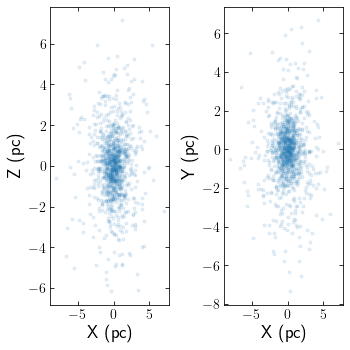

In [9]:
cts.starplot(cluster)

When manually setting up a cluster, key cluster parameters will not be calculated unless the function ``key_params()`` is called. 

In [10]:
cluster.analyze()

In [11]:
print('Total Number of Stars = ',cluster.ntot)
print('Total Mass = ',cluster.mtot)
print('Mean Mass = ',cluster.mmean)
print('Mean Radius = ',cluster.rmean)
print('Maximum Radius = ',cluster.rmax)
print('Half-mass radius = ',cluster.rm)
print('Projected Half-mass radius = ',cluster.rmpro)
print('10% Lagrange radius = ',cluster.r10)
print('Projected 10% Lagrange radius = ',cluster.r10pro)

Total Number of Stars =  1000
Total Mass =  349.28177634
Mean Mass =  0.34928177634
Mean Radius =  2.45102483757
Maximum Radius =  8.32425911109
Half-mass radius =  1.96178691294
Projected Half-mass radius =  1.50302785137
10% Lagrange radius =  0.733265989776
Projected 10% Lagrange radius =  0.490977522097


Alternatively, several functions have been written to more easily load a snapshot of a cluster.  For example, snapshot 00000.dat could more easily be loaded via:

In [17]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster')

When using load_cluster, key cluster parameters are instantly calculated.

In [8]:
print('Total Number of Stars = ',cluster.ntot)
print('Total Mass = ',cluster.mtot)
print('Mean Mass = ',cluster.mmean)
print('Mean Radius = ',cluster.rmean)
print('Maximum Radius = ',cluster.rmax)
print('Half-mass radius = ',cluster.rm)
print('Projected Half-mass radius = ',cluster.rmpro)
print('10% Lagrange radius = ',cluster.r10)
print('Projected 10% Lagrange radius = ',cluster.r10pro)


Total Number of Stars =  1000
Total Mass =  349.28177634
Mean Mass =  0.34928177634
Mean Radius =  2.45102483757
Maximum Radius =  8.32425911109
Half-mass radius =  1.96178691294
Projected Half-mass radius =  1.50302785137
10% Lagrange radius =  0.733265989776
Projected 10% Lagrange radius =  0.490977522097


If the columns in your snapshot do not have the format mass,x,y,z,vx,vy,vz,i_d,kw, then use ``col_names`` and ``col_nums`` when using ``load_cluster``

In [9]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',
                            col_names=["m", "x", "y", "z", "vx", "vy", "vz"],col_nums=[0, 1, 2, 3, 4, 5, 6],)

If the orbital information of your simulated cluster is known, and is contained in a file with columns of time, x, y, z, vx, vy, vz then either the filename can be given to the ``load_cluster`` command using the ``ofilename`` flag: 

In [10]:
cluster=cts.load_cluster('snapshot',filename='00000.dat',units='pckms',origin='cluster',
                            col_names=["m", "x", "y", "z", "vx", "vy", "vz"],
                            col_nums=[0, 1, 2, 3, 4, 5, 6], ofilename='orbit.dat')

Alternatively, orbital information can be read in and added separately. If the units in ``orbit.dat`` are not the same as ``cluster.units``, one can use the ``ounits`` flag in ``add_orbit``. They will be converted to cluster.units.

In [11]:
t,xgc,ygc,zgc,vxgc,vygc,vzgc=np.loadtxt('orbit.dat',unpack=True)
cluster.tphys=t[0]
cluster.add_orbit(xgc[0],ygc[0],zgc[0],vxgc[0],vygc[0],vzgc[0],ounits='kpckms')
print(cluster.tphys,cluster.xgc,cluster.ygc,cluster.zgc,cluster.vxgc,cluster.vygc,cluster.vzgc)

0.0 10000.0 0.0 0.0 0.0 220.0 0.0


**Loading Amuse**

If you have run an Nbody simulation with amuse,  amuse particle sets can also be loaded:

0

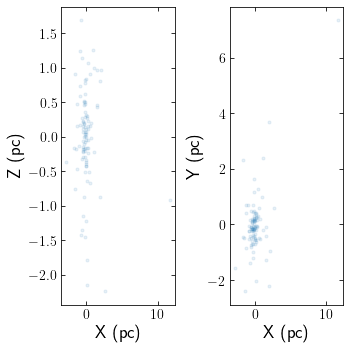

In [12]:
from amuse.lab import *
from amuse.units import nbody_system,units
N=100
Mcluster=100.0 | units.MSun
Rcluster= 1.0 | units.parsec
converter=nbody_system.nbody_to_si(Mcluster,Rcluster)
stars=new_plummer_sphere(N,converter)

cluster=cts.load_cluster('amuse',particles=stars,units='pckms',origin='cluster')
cts.starplot(cluster)

Alternatively, if you have amuse data saved in an hdf5 file created via AMUSE's write_set_to_file function, you can set the ``filename`` instead of particles.

**Loading Astropy Tables**


Clusters can be read in from astropy tables aswell. The below example reads in an N-body simulation of Pal 5 in units of ``kpckms`` in Galactocentric coordinates. The snapshot corresponds to Pal 5's most recent pericentre pass.

0

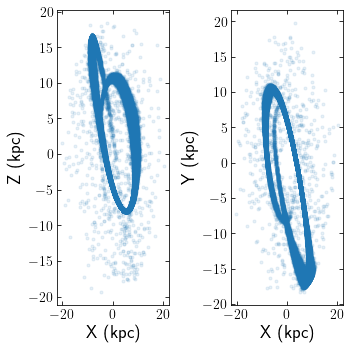

In [13]:
data = QTable.read("pal5_rp.dat", format="ascii")
cluster = cts.load_cluster('astropy_table',particles=data, units='kpckms',origin='galaxy')
cts.starplot(cluster)

**Loading Galpy**

If you have initiated a collection of galpy orbits, potentially through a galpydf function,
clustertools can convert the orbit instances into a StarCluster

0

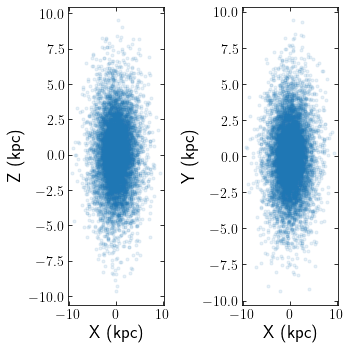

In [14]:
#From https://docs.galpy.org/en/v1.7.2/reference/df.html
from galpy.df import kingdf
kdf= kingdf(M=2.3,rt=1.4,W0=3.) #Kingdf defined using internal galpy units
sam= kdf.sample(n=int(1e4)) #sam will be an array of galpy orbits, which by default return values in kpc and km/s

cluster=cts.load_cluster('galpy',particles=sam,units='kpckms',origin='cluster')
cts.starplot(cluster)

**Loading LIMEPY**

If you have initiated a ``limepy`` model, clustertools will call limepys sample routine
to generate a cluster.

0

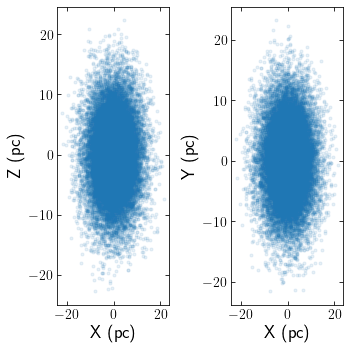

In [15]:
#From https://github.com/mgieles/limepy/blob/master/notebooks/00_kingmodel.ipynb
from limepy import limepy
W0, g = 7, 1
k = limepy(W0, g, M=1e5, rh=3)

cluster=cts.load_cluster('limepy',model=k,units='pckms',origin='cluster')
cts.starplot(cluster)


**Loading Nbody6**

To load an NBODY6 snapshot from OUT33 and OUT9 files:

0

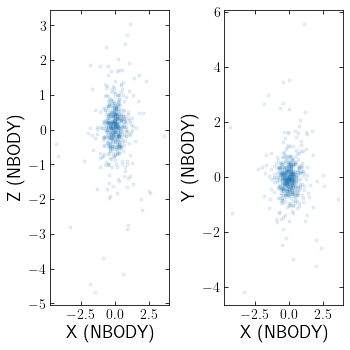

In [16]:
cluster=cts.load_cluster('nbody6',wdir='./nbody6_sim/')
cts.starplot(cluster)

``clustertools`` knows that when reading in NBODY6 snapshots, the units will be ``'nbody'`` units and the origin will be ``'cluster'``. For an NBODY6 simulation with stellar evolution, fort.82 and fort.83 will also be read.

**Loading Nbody6++**

Nbody6++ is also supported, which simply requires a different option for ctype. There is also an option to set ``hdf5=True`` to read in data from the HDF5 files created by Nbody6++. I recomend caution when using ``hdf5=True`` as I have seen different versions of Nbody6++ use different hdf5 formats. ``clustertools`` currently assumes one is using the version at https://github.com/nbodyx/Nbody6ppGPU

0

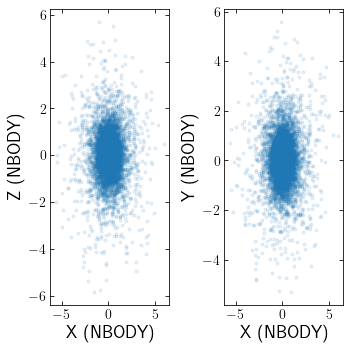

In [17]:
cluster=cts.load_cluster('nbody6pp')
cts.starplot(cluster)

**Loading Nemo/Gyrfalcon**


For a gyrfalcon simulation. the first cluster snapshot can be read in using:

0

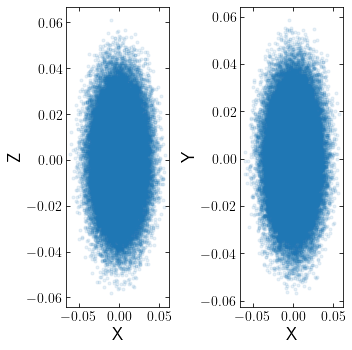

In [18]:
cluster=cts.load_cluster('gyrfalcon',filename='cluster.nemo.dat',units='WDunits',origin='cluster')
cts.starplot(cluster)

Note that since gyrfalcon does not have a default output filename like NBODY6, the filename must be specifified. Furthermore, gyrfalcon's output is a binary file that must be converted to ascii using NEMO's ``s2a`` command before it can be read in by ``clustertools``. Finally, units and origin must be specified, since Gyrfalcon can output data in WDunits or nbody units and the origin can either be the galaxy or the cluster.

**Advancing**

In most cases, it is desirable to read more than just the first timestep of a simulation. ``clustertools`` has been set up to easily read in a snapshot, calculate key cluster parameters, and then advance to the next snapshot. An advance can easily be first reading in the cluster:

In [19]:
cluster=cts.load_cluster(ctype='nbody6',wdir='./nbody6_sim/')


``advance_cluster`` will then move to the next timestep. One can then keep track of properties like time and mass to follow a cluster's evolution.

In [20]:
t=[]
m=[]

while cluster.ntot>0:
    cluster.to_pckms()
    t.append(cluster.tphys)
    m.append(np.sum(cluster.m))
    cluster=cts.advance_cluster(cluster,wdir='./nbody6_sim/')


Text(0, 0.5, '$ \\rm Mass \\ (M_{\\odot})$')

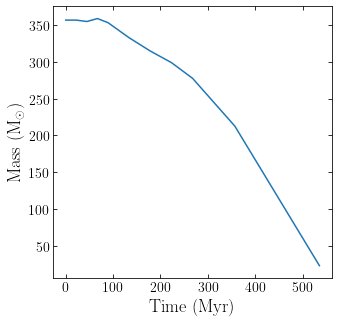

In [21]:
plt.plot(t,m)
plt.xlabel(r'$ \rm Time \ (Myr)$')
plt.ylabel(r'$ \rm Mass \ (M_{\odot})$')

For the previous case above where the first snapshot had a filename of 00000.dat, ``advance_cluster`` will look for a filename titled 00001.dat. If your filenames have a different naming convention, just specify some of the keyword arguments when loading the first snapshot. For example, if your snapshots are named snap_cluster_001.txt and snap_cluster_002.txt, they can be loaded via:

0

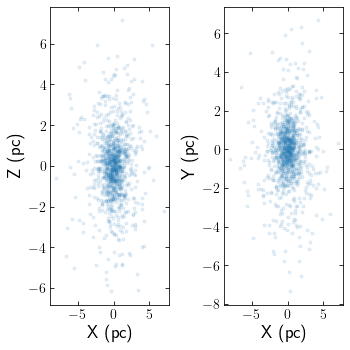

In [27]:
cluster=cts.load_cluster('snapshot',snapbase='snap_cluster_',nsnap=1,nzfill=3,snapend='.txt',snapdir='',units='pckms',origin='cluster')
cluster=cts.advance_cluster(cluster)
cts.starplot(cluster)